In [116]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport

# Visualización del dataset

In [117]:
df = pd.read_csv('../dataset/steam_dataset.csv')
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 25/25 [00:00<00:00, 7581.35it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 1. Descripción del dataset.

La importancia del dataset consiste en que comprender qué características técnicas y funcionales se asocian al éxito de un juego resulta relevante tanto desde un punto de vista económico como analítico, ya que permite estudiar aceptación del usuario en cuanto a funcionalidades y tecnologías.

Las preguntas a resolver serán diferentes en el modelo de aprendizaje supervisado y no supervisado aunque se realizarán solo sobre los videojuegos:

### Análisis supervisado

> ¿Qué características de un videojuego están asociadas a una alta valoración (>80%) por parte de los usuarios?

Para responder a esta cuestión, se definirá una variable objetivo binaria a partir del porcentaje de reseñas positivas (`positive_reviews_per`), considerando como *alta valoración* aquellos videojuegos que superen el **80 % de reseñas positivas**.

Se evaluará la viabilidad de construir un modelo predictivo capaz de discriminar entre videojuegos con alta y baja valoración, analizando su rendimiento mediante métricas de clasificación, en particular el **área bajo la curva ROC (AUC)**.

### Análisis no supervisado

> ¿Existen distintos grupos en Steam en función de sus características técnicas y funcionales?

En este caso, no se utilizará ninguna variable objetivo, sino que se aplicarán técnicas de **clustering** para identificar agrupaciones naturales dentro del conjunto de datos. El objetivo es detectar patrones latentes que permitan segmentar los videojuegos según sus funcionalidades, plataformas y características técnicas. Se comprobará si se puede obtener una buena clusterización y realizar predicciones sobre pertenencia a grupos con este modelo.


### Variables

| Variable                       | Tipo                    | Tamaño / Descripción                                  |
| ------------------------------ | ----------------------- | ----------------------------------------------------- |
| **title**                      | Texto                   | 1.932 registros (1.931 valores únicos)                |
| **app_id**                     | Numérica (entera, ID)   | 1.932 registros (1932 valores únicos)                                  |
| **app_type**                   | Categórica nominal      | 5 categorías (Game, Application, Demo, Tool, Beta)                     |
| **developer**                  | Texto                   | 1.914 registros (1.394 valores únicos)                                 |
| **publisher**                  | Texto                   | 1.910 registros (1.062 valores únicos)                                 |
| **platforms**                  | Categórica nominal      | 1894 registros 6 categorías (combinaciones Windows, macOS y Linux)   |
| **technologies**               | Texto                   | 1.488 registros (174 valores únicos)                                   |
| **last_changenumber**          | Numérica continua       | 1.932 registros                                                        |
| **last_record_update**         | Temporal (fecha)        | 1.932 registros                                                        |
| **release_date**               | Temporal (fecha)        | 1.910 registros                                                        |
| **positive_reviews_per**       | Numérica continua       | 1.880 registros                                                        |
| **total_reviews**              | Numérica continua       | 1.880 registros                                                        |
| **player_count_now**           | Numérica continua       | 528 registros                                                         |
| **multiplayer**                | Categórica binaria      | 1.932 registros 2 categorías (0, 1)                                   |
| **steam_trading_cards**        | Categórica binaria      | 1.932 registros 2 categorías (0, 1)                                   |
| **valve_anti_cheat**           | Categórica binaria      | 1.932 registros 2 categorías (0, 1)                                   |
| **in_app_purchases**           | Categórica binaria      | 1.932 registros 2 categorías (0, 1)                                   |
| **steam_workshop**             | Categórica binaria      | 1.932 registros 2 categorías (0, 1)                                   |
| **cloud_gaming**               | Categórica binaria      | 1.932 registros 2 categorías (0, 1)                                   |
| **cross_platform_multiplayer** | Categórica binaria      | 1.932 registros 2 categorías (0, 1)                                   |
| **stats**                      | Categórica binaria      | 1.932 registros 2 categorías (0, 1)                                   |
| **remote_play_on_phone**       | Categórica binaria      | 1.932 registros 2 categorías (0, 1)                                   |
| **remote_play_on_tablet**      | Categórica binaria      | 1.932 registros 2 categorías (0, 1)                                   |
| **sys_date**                   | Temporal (fecha y hora) | 1.932 registros                                                        |
| **href**                       | Texto (URL)             | 1.932 registros (1932 valores únicos)                                  |


### Correlaciones

In [118]:
df_corr = df.copy()

# object -> factor
for col in df_corr.columns:
    if df_corr[col].dtype == "object":
        df_corr[col] = pd.factorize(df_corr[col])[0]

df_corr = df_corr.dropna()

# Correlation
corr = df_corr.corr()

# Columns to rows
corr_long = (
    corr
    .where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

corr_long.columns = ["Variable 1", "Variable 2", "Correlación"]
corr_long["|Correlación|"] = corr_long["Correlación"].abs()
corr_long["Signo"] = corr_long["Correlación"].apply(lambda x: "+" if x > 0 else "-")

top10_corr = (
    corr_long
    .sort_values("|Correlación|", ascending=False)
    .head(30)
    .reset_index(drop=True)
)

top10_corr

Variable 1                  Variable 2  Correlación  \
0               sys_date                        href     1.000000   
1                  title                        href     1.000000   
2                  title                    sys_date     1.000000   
3           release_date                    sys_date     0.980604   
4           release_date                        href     0.980604   
5                  title                release_date     0.980602   
6          total_reviews            player_count_now     0.929617   
7                  title          last_record_update     0.888276   
8     last_record_update                        href     0.888275   
9     last_record_update                    sys_date     0.888275   
10    last_record_update                release_date     0.875839   
11             developer                release_date     0.753417   
12             developer                        href     0.752596   
13             developer                    sys_date     0.752596   
14                 title                   developer     0.752593   
15             developer                   publisher     0.740321   
16             developer          last_record_update     0.735801   
17  remote_play_on_phone       remote_play_on_tablet     0.651835   
18             publisher          last_record_update     0.580881   
19             publisher                        href     0.578475   
20             publisher                    sys_date     0.578475   
21                 title                   publisher     0.578442   
22             publisher                release_date     0.577513   
23  positive_reviews_per            in_app_purchases    -0.464840   
24      player_count_now            valve_anti_cheat     0.444283   
25         total_reviews            valve_anti_cheat     0.424192   
26                app_id         steam_trading_cards    -0.355349   
27      in_app_purchases  cross_platform_multiplayer     0.336269   
28           multiplayer  cross_platform_multiplayer     0.323855   
29           multiplayer            in_app_purchases     0.320026   

    |Correlación| Signo  
0        1.000000     +  
1        1.000000     +  
2        1.000000     +  
3        0.980604     +  
4        0.980604     +  
5        0.980602     +  
6        0.929617     +  
7        0.888276     +  
8        0.888275     +  
9        0.888275     +  
10       0.875839     +  
11       0.753417     +  
12       0.752596     +  
13       0.752596     +  
14       0.752593     +  
15       0.740321     +  
16       0.735801     +  
17       0.651835     +  
18       0.580881     +  
19       0.578475     +  
20       0.578475     +  
21       0.578442     +  
22       0.577513     +  
23       0.464840     -  
24       0.444283     +  
25       0.424192     +  
26       0.355349     -  
27       0.336269     +  
28       0.323855     +  
29       0.320026     +

Las correlaciones que nos interesan son:

- positive_reviews_per – in_app_purchases (-0.46): Las microtransacciones se asocian a peor valoración, esto es algo que ya se ha reflejado en quejas de usuarios sobre juegos (https://www.verdict.co.uk/microtransactions-have-always-had-a-bad-reputation-among-gamers/)
- multiplayer – in_app_purchases (0.32): Los juegos multijugador tienen una relación lineal alta con poseer microtransacciones, puede afectar a que esta categoría se asocie con un porcentaje menor de puntuación debido a ello.

El resto de correlaciones no nos aportan información tan directa.

## 2. Selección de variables para el modelo supervisado

### Variable objetivo

- **high_rating**  
  Variable binaria definida a partir de `positive_reviews_per`, donde:
  - `high_rating = 1` si `positive_reviews_per > 80`
  - `high_rating = 0` en caso contrario

Se eliminan los registros nulos en `positive_reviews_per` ya que solo corresponden al 2.7% del total, es despreciable. La correlación de nulos entre `positive_reviews_per` y `total_reviews` es del 100% por lo que eliminando los registros nulos de uno se eliminan los del otro.


### Variables excluidas del modelo

Las siguientes variables se excluyen por no aportar información predictiva:

- **app_type**  
  Se excluye al haberse fijado como criterio de filtrado (`Game`).

- **title**, **app_id**, **href**  
  Variables identificativas sin valor predictivo.

- **developer**, **publisher**  
  Propensas al sobreajuste y a aportar "la valoración de la marca al producto", el modelo no debe contar con esta información.

- **technologies**  
  Presenta un alto porcentaje de valores perdidos y gran heterogeneidad.

- **last_changenumber**, **last_record_update**, **sys_date**  
  Variables técnicas sin relación directa con la valoración del usuario.

- **total_reviews**  
  No aporta información, se usa el porcentaje.

- **player_count_now**  
  Se descarta debido a su elevado porcentaje de valores ausentes.

El resto de variables seleccionadas tienen importancia en el cálculo de puntuación, se selecciona sys_date porque se va a utilizar para calcular la antigüedad del juego junto con release_date, ya que muchas veces los juegos recientes tienen menos puntuación por bugs y poco contenido hasta que pasa un tiempo y se soluciona.

In [119]:
# Filter by games only
df_games = df[df["app_type"] == "Game"].copy()

# Make target variable
df_games.dropna(subset = ["positive_reviews_per"], inplace=True)
df_games["high_rating"] = (df_games["positive_reviews_per"] > 80).astype(int)

# Selection
features = [
    "platforms",
    "multiplayer",
    "cross_platform_multiplayer",
    "steam_workshop",
    "steam_trading_cards",
    "in_app_purchases",
    "valve_anti_cheat",
    "cloud_gaming",
    "stats",
    "remote_play_on_phone",
    "remote_play_on_tablet",
    "release_date",
    "sys_date" # For variable engineering
]


df_supervisado = df_games[features + ["high_rating"]].copy()
df_supervisado.head(), df_supervisado.shape

(             platforms  multiplayer  cross_platform_multiplayer  \
 0        Windows Linux            1                           1   
 1  Windows macOS Linux            1                           0   
 2              Windows            1                           0   
 3              Windows            1                           1   
 4        Windows macOS            0                           0   
 
    steam_workshop  steam_trading_cards  in_app_purchases  valve_anti_cheat  \
 0               1                    1                 1                 1   
 1               1                    1                 1                 1   
 2               0                    0                 0                 0   
 3               0                    0                 1                 0   
 4               1                    1                 0                 0   
 
    cloud_gaming  stats  remote_play_on_phone  remote_play_on_tablet  \
 0             1      1                   

## 3. Limpieza de datos

En el caso de la variable platforms obtenemos valores como Windows macOS y macOS Windows que se pueden solucionar uniéndolos en un mismo valor. El problema es que el 67 % de los juegos son solo Windows y obtenemos poca representación del resto de categorías, aun así esta variable aporta información y un 33% restante sigue siendo significativo estadísticamente. Muchas veces los ports pueden influir en las reseñas por lo que merece la pena que el modelo capture esta información.

In [120]:
df_supervisado.dropna(subset=["platforms"], inplace=True)

platform_mapping = {
    "Windows": 1,
    "Windows macOS": 2,
    "macOS Windows": 2,
    "Windows Linux": 3,
    "Windows macOS Linux": 4,
    "macOS Windows Linux": 4
}

df_supervisado["platform"] = df_supervisado["platforms"].map(platform_mapping)
df_supervisado.drop(columns=["platforms"], inplace=True)

Una variable creada que puede ser interesante es una que mida cuantos meses lleva el juego desde su lanzamiento para observar si juegos con más tiempo ganan por lo general una mayor valoración debido a la corrección de bugs y adición de contenido.

In [121]:
df_supervisado.dropna(subset=["release_date"], inplace=True)

df_supervisado["release_date"] = (
    df_supervisado["release_date"]
    .str.replace(r"\s*–\s*", " ", regex=True)       # guion largo con espacios
    .str.replace(r" UTC \( \)", "", regex=True)      # elimina " UTC ( )"
    .str.strip()
)

df_supervisado["release_date"] = pd.to_datetime(
    df_supervisado["release_date"],
    format="%d %B %Y %H:%M:%S",
    errors="coerce"
)

def parse_date_safe(date_str):
    try:
        # try with 'T'
        return pd.to_datetime(date_str, format="%Y-%m-%dT%H:%M:%S.%f")
    except:
        # try without 'T'
        return pd.to_datetime(date_str, format="%Y-%m-%d %H:%M:%S.%f")

df_supervisado["sys_date"] = df_supervisado["sys_date"].apply(parse_date_safe)


# Calculate months
df_supervisado["months_since_release"] = (
    (df_supervisado["sys_date"] - df_supervisado["release_date"])
    .dt.days / 30
)

# Min 1 max 24
df_supervisado["months_since_release"] = (
    df_supervisado["months_since_release"]
    .clip(lower=1, upper=24)
)

# Assign labels to month range
bins = [0, 1, 3, 6, 12, 18, 24]
labels = [1, 3, 6, 12, 18, 24]

df_supervisado["months_since_release"] = pd.cut(
    df_supervisado["months_since_release"],
    bins=bins,
    labels=labels,
    include_lowest=True
).astype(int)

df_supervisado.drop(columns=["release_date", "sys_date"], inplace=True)
df_supervisado.head(10)
df_supervisado.to_csv("steam_dataset_training.csv", index=False)

Antes de continuar hay que ver la distribución de número de juegos por los periodos que hemos creado. Obviamente va a ser una distribución en forma de cola sesgada con la mayoría de juegos en valores más altos.

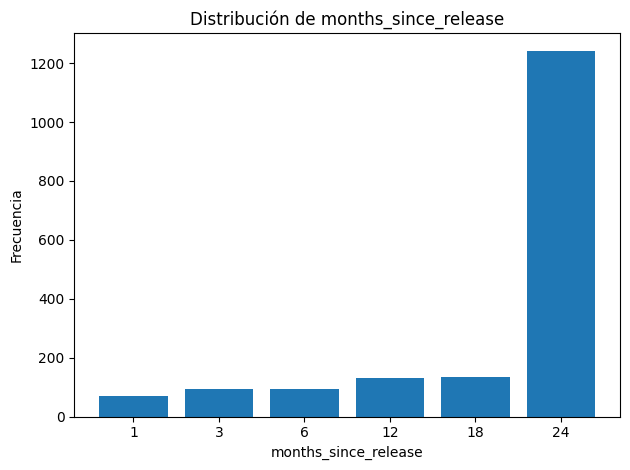

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt

counts = df_supervisado["months_since_release"].value_counts().sort_index()

fig, ax = plt.subplots()
ax.bar(counts.index.astype(str), counts.values)

ax.set_xlabel("months_since_release")
ax.set_ylabel("Frecuencia")
ax.set_title("Distribución de months_since_release")

plt.tight_layout()
plt.show()


Nos interesa ver si existe una distribución muy variable con el porcentaje de reseñas negativas y antigüedad. Como he explicado antes, las reseñas negativas deberían acumularse en juegos nuevos más que en juegos antigüos debido a bugs de salida y altas espectativas a corto plazo. Lo que encontramos es muchas más reseñas por debajo del 80% positivo en juegos que tienen menos de un mes y en juegos de entre un año y 18 meses. No varían tan significativamente entre ellas por lo que vamos a obviar esto.

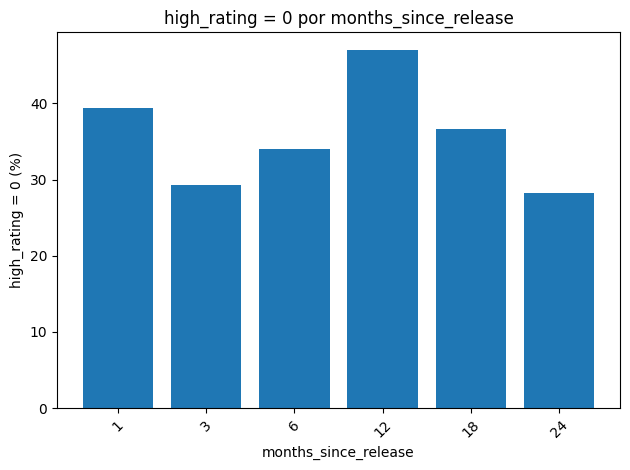

In [123]:
# Percentaje of high_rating = 0 per months_since_release
percent_high_rating_0 = (
    df_supervisado
    .groupby("months_since_release")["high_rating"]
    .apply(lambda x: (x == 0).mean() * 100)
    .sort_index()
)

fig, ax = plt.subplots()
ax.bar(
    percent_high_rating_0.index.astype(str),
    percent_high_rating_0.values
)

ax.set_xlabel("months_since_release")
ax.set_ylabel("high_rating = 0 (%)")
ax.set_title("high_rating = 0 por months_since_release")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Antes de pasar a modelado comprobaré que no queda ningún null, ya tenemos todos los valores como integers así que no habrá problemas para usar varios modelos que no puedan ingestar variables categóricas.

In [124]:
num_filas_con_algun_null = df_supervisado.isna().any(axis=1).sum()
print("Rows with at least one null:", num_filas_con_algun_null)
print("Total rows:", df_supervisado.shape)

Rows with at least one null: 0
Total rows: (1764, 13)


Como se ve, el porcentaje de juegos con high_rating es 68.87% por lo que los datos están desbalanceados, hay que tener en cuenta esto para el modelado.

In [125]:
percent = df_supervisado["high_rating"].value_counts(normalize=True) * 100
print("\nPorcentaje:")
print(percent)


Porcentaje:
high_rating
1    68.877551
0    31.122449
Name: proportion, dtype: float64


## 4. Análisis de los datos.

Primero se preparan los datos resultado de la variable objetivo (high_rating) en Y y el resto de las variables predictoras (X).

In [126]:
X = df_supervisado.drop('high_rating', axis=1)
y = df_supervisado['high_rating']

Para el modelado usaremos varios modelos para calcular las métricas de cada uno y elegir cual se ajusta mejor a nuestra variable objetivo. Posteriormente se analizará porque ese modelo es mejor que los otros y por qué.

El primer modelo es GradientBoostingClassifier, es un modelo bueno para problemas no lineales ni simples ya que aplica muchos árboles de decisión en serie mientras intenta acercarse lo máximo posible a una precisión perfecta. Cuantos más árboles y cuanta más profundidad más ruidp y casos atípicos empieza a tener en cuenta. Como en nuestro caso, el número de datos es pequeño, no interesa que se vuelva tan complejo ya que tendería a sobreajustar.

In [127]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

gbm = GradientBoostingClassifier(
    n_estimators=150, # Number of trees
    learning_rate=0.05, 
    max_depth=3, # Maximum depth of the tree
    random_state=42)

El XGBClassifier es una versión más avanzada de boosting que al igual que GradientBoosting construye muchos árboles de decisión en serie. Cada árbol corrige los errores de los anteriores, pero además incorpora regularización y control del sobreajuste (reg_alpha y reg_lambda), lo que le permite aprender patrones complejos sin memorizar demasiado los datos. Es especialmente bueno en problemas no lineales y con interacciones entre variables.

En cuanto a los mecanismos de control de sobreajuste, reg_alpha aplica una penalización tipo L1 sobre los pesos de los árboles, lo que empuja hacia cero las contribuciones de las variables que aportan poco. Esto ayuda a que el modelo ignore características débiles o ruidosas, evitando que se sobreajuste. reg_lambda aplica una penalización tipo L2, suavizando los pesos demasiado grandes y evitando que un solo árbol domine la predicción con valores extremos.

eval_metric='logloss' indica al modelo cómo evaluar sus predicciones durante el entrenamiento. El logloss mide qué tan cerca están las probabilidades predichas de la clase real (0 o 1). Si el modelo predice una probabilidad alta para la clase correcta (probabilidad predecidad de 1 = 90% -> logloss = 1-0.9 = 0.1), el logloss es bajo, si predice una probabilidad alta para la clase incorrecta, el logloss es alto. Esta métrica se traduce en el sumatorio de los errores de todas las predicciones.

In [128]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=150, 
    learning_rate=0.05, 
    max_depth=3, 
    colsample_bytree=0.8, # Subsample ratio of columns when constructing each tree
    random_state=42, 
    reg_alpha=0.5,
    reg_lambda=1.0,
    objective='binary:logistic',
    eval_metric='logloss')

DecisionTreeClassifier es un modelo que construye un árbol de decisiones dividiendo los datos en función de las variables más informativas, formando ramas y hojas que predicen la clase. A diferencia de GradientBoosting o XGBoost, este modelo no combina varios árboles, sino que intenta encontrar un único árbol que clasifique los datos lo mejor posible.

En este modelo, min_samples_leaf=50 garantiza que cada hoja contenga al menos 50 filas, de manera que las decisiones estén basadas en suficientes datos y no en excepciones aisladas. Una hoja es el nodo final de un árbol que tiene el valor 0 o 1 de high_rating y se caracteriza por contener todas las observaciones que cumplen las condiciones definidas por las ramas anteriores, representando la predicción del modelo para esos casos específicos, reune esas filas que han ido cumpliendo las reglas de las otras ramas y es la hoja en la que entrará una fila a predecir en caso de que se parezca mucho a esas otras que han definido la hoja.

In [129]:
from sklearn.tree import DecisionTreeClassifier

glm = DecisionTreeClassifier(
    min_samples_split=200,
    min_samples_leaf=50, # Min number of samples required to be at a leaf
    max_depth=4,
    random_state=42
)

El RandomForestClassifier es un modelo que combina muchos árboles de decisión independientes para crear un bosque de árboles. Cada árbol aprende de una muestra aleatoria de los datos y considera solo un subconjunto de variables en cada división, lo que hace que cada árbol sea ligeramente diferente. Al final, la predicción del bosque se obtiene por votación de todos los árboles, reduciendo el riesgo de sobreajuste y aumentando la estabilidad del modelo.

En este caso hemos introducido min_samples_split=50, esto significa que un nodo se dividirá cuando haya 50 muestras en el nodo.

In [130]:
mlp = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    min_samples_split=50,
    min_samples_leaf=20,
    max_features="sqrt", # Number of features to consider -> sqrt(13)
    random_state=42,
    n_jobs=-1
)

In [131]:
models = [gbm, xgb_model, glm, mlp]

En lugar de Kfold usaremos StratifiedKFold ya que nos permite mantener el porcentaje de clases en cada fold y no desbalancear cada capa de entrenamiento, esto se hace por la gran cantidad de juegos con high_rating=1.

In [132]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

Todos los modelos evaluados (Gradient Boosting, XGBoost, Decision Tree y Random Forest) presentan valores de accuracy y AUC muy similares, situándose alrededor del 78–79% de accuracy y 0.78–0.79 de AUC. Esto indica que, independientemente del algoritmo utilizado, todos están capturando esencialmente la misma estructura de información presente en los datos. O esto sería en el caso de no tener un FPR aleatorio...

¿A qué se debe esto? Principalmente a un bajo número de datos, variables y tenemos una variable muy dominante para la elección: in_app_purchases. Antes se había visto que la correlación entre reseñas negativas y que haya microtransacciones es muy elevada por lo que ahí tenemos la mayoría de información sacada de los modelos. Esto es negativo ya que tiene a sobreajustar esa elección a cualquier juego con micropagos.

Gradient Boosting - Confusion Matrix (Fold 1):
[[ 51  59]
 [ 24 219]]



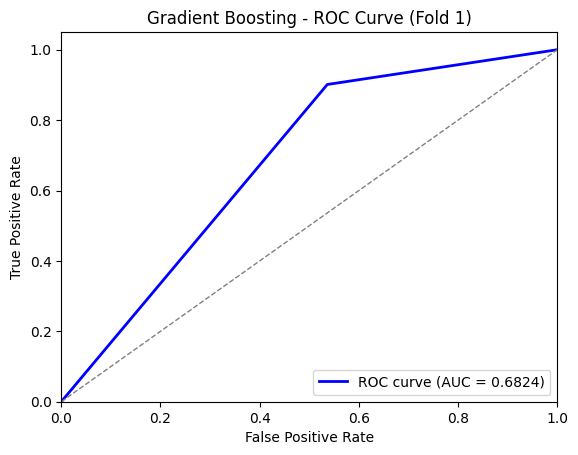

Gradient Boosting - Confusion Matrix (Fold 1):
[[ 54  56]
 [ 22 221]]

Gradient Boosting - Confusion Matrix (Fold 1):
[[ 51  59]
 [ 18 225]]

Gradient Boosting - Confusion Matrix (Fold 1):
[[ 56  54]
 [ 20 223]]

Gradient Boosting - Confusion Matrix (Fold 1):
[[ 56  53]
 [ 18 225]]

Gradient Boosting - Average Metrics Across Folds
  Accuracy: 0.7829 ± 0.0113
  AUC:      0.7883 ± 0.0055
Gradient Boosting - Mean Feature Importances Across Folds:
                       feature  mean_importance
4             in_app_purchases         0.580579
10                    platform         0.093349
0                  multiplayer         0.069617
11        months_since_release         0.068054
2               steam_workshop         0.044186
8         remote_play_on_phone         0.042822
3          steam_trading_cards         0.028945
1   cross_platform_multiplayer         0.028516
6                 cloud_gaming         0.019253
7                        stats         0.013415
9        remote_play_on_

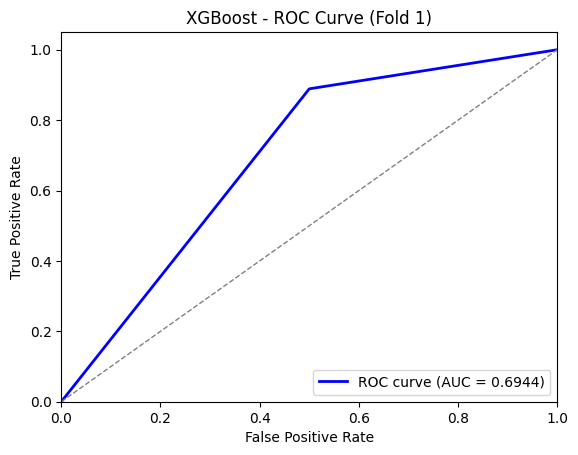

XGBoost - Confusion Matrix (Fold 1):
[[ 53  57]
 [ 21 222]]

XGBoost - Confusion Matrix (Fold 1):
[[ 53  57]
 [ 15 228]]

XGBoost - Confusion Matrix (Fold 1):
[[ 56  54]
 [ 20 223]]

XGBoost - Confusion Matrix (Fold 1):
[[ 55  54]
 [ 15 228]]

XGBoost - Average Metrics Across Folds
  Accuracy: 0.7874 ± 0.0128
  AUC:      0.7933 ± 0.0057
XGBoost - Mean Feature Importances Across Folds:
                       feature  mean_importance
4             in_app_purchases         0.515502
0                  multiplayer         0.110110
1   cross_platform_multiplayer         0.078144
10                    platform         0.073142
2               steam_workshop         0.063680
8         remote_play_on_phone         0.045129
3          steam_trading_cards         0.027698
11        months_since_release         0.021946
9        remote_play_on_tablet         0.020421
6                 cloud_gaming         0.017619
7                        stats         0.016451
5             valve_anti_cheat      

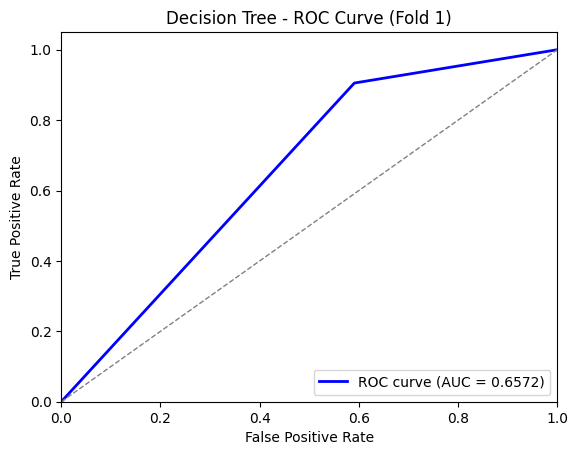

Decision Tree - Confusion Matrix (Fold 1):
[[ 50  60]
 [ 28 215]]

Decision Tree - Confusion Matrix (Fold 1):
[[ 49  61]
 [ 17 226]]

Decision Tree - Confusion Matrix (Fold 1):
[[ 54  56]
 [ 21 222]]

Decision Tree - Confusion Matrix (Fold 1):
[[ 55  54]
 [ 18 225]]

Decision Tree - Average Metrics Across Folds
  Accuracy: 0.7716 ± 0.0179
  AUC:      0.7658 ± 0.0039
Decision Tree - Mean Feature Importances Across Folds:
                       feature  mean_importance
4             in_app_purchases         0.773326
10                    platform         0.086051
0                  multiplayer         0.081604
3          steam_trading_cards         0.028541
11        months_since_release         0.012849
6                 cloud_gaming         0.008139
1   cross_platform_multiplayer         0.005822
9        remote_play_on_tablet         0.003667
2               steam_workshop         0.000000
5             valve_anti_cheat         0.000000
7                        stats         0.000000


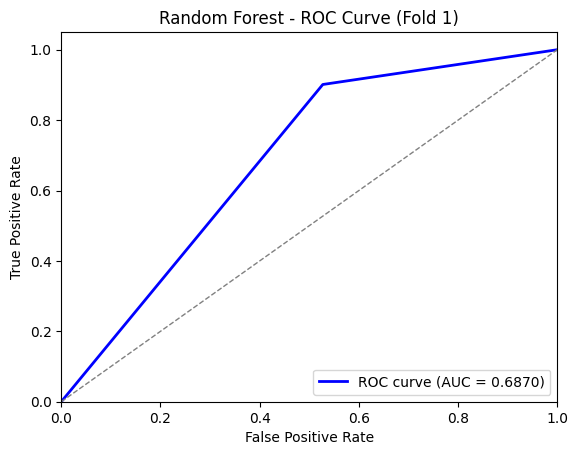

Random Forest - Confusion Matrix (Fold 1):
[[ 47  63]
 [ 23 220]]

Random Forest - Confusion Matrix (Fold 1):
[[ 48  62]
 [ 14 229]]

Random Forest - Confusion Matrix (Fold 1):
[[ 52  58]
 [ 17 226]]

Random Forest - Confusion Matrix (Fold 1):
[[ 52  57]
 [ 14 229]]

Random Forest - Average Metrics Across Folds
  Accuracy: 0.7789 ± 0.0149
  AUC:      0.7870 ± 0.0066
Random Forest - Mean Feature Importances Across Folds:
                       feature  mean_importance
4             in_app_purchases         0.508312
0                  multiplayer         0.133967
10                    platform         0.115740
1   cross_platform_multiplayer         0.114723
11        months_since_release         0.031312
3          steam_trading_cards         0.027589
2               steam_workshop         0.025348
8         remote_play_on_phone         0.020271
6                 cloud_gaming         0.012746
9        remote_play_on_tablet         0.008926
7                        stats         0.000936


In [133]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, auc, roc_curve

X = df_supervisado.drop('high_rating', axis=1)

model_names = ['Gradient Boosting', 'XGBoost', 'Decision Tree', 'Random Forest']

for model, name in zip(models, model_names):
    accuracies = []
    aucs = []
    fold_importances = []
    
    for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Train model
        model.fit(X_train, y_train)

        # Predict test layer
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad clase 1

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print(f"{name} - Confusion Matrix (Fold 1):\n{cm}\n")
        
        # Metrics
        acc = accuracy_score(y_test, y_pred)
        r_auc = roc_auc_score(y_test, y_pred_proba)
        accuracies.append(acc)
        aucs.append(r_auc)
        
        # Feature importances
        importances = model.feature_importances_
        fold_importances.append(importances)

        # AUC 
        if fold == 1:
            fpr, tpr, thresholds = roc_curve(y_test, y_pred)
            roc_auc = auc(fpr, tpr)
            
            plt.figure()
            plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
            plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{name} - ROC Curve (Fold 1)')
            plt.legend(loc="lower right")
            plt.show()
    
    # Promedio de importancias por variable
    fold_importances = np.array(fold_importances)
    mean_importances = np.mean(fold_importances, axis=0)
    feat_imp = pd.DataFrame({
        'feature': X.columns,
        'mean_importance': mean_importances
    }).sort_values(by='mean_importance', ascending=False)
    
    # Print final metrics
    print(f"{name} - Average Metrics Across Folds")
    print(f"  Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"  AUC:      {np.mean(aucs):.4f} ± {np.std(aucs):.4f}")
    print(f"{name} - Mean Feature Importances Across Folds:\n{feat_imp}\n")

En esta versión se valoran los modelos sin contar con esa variable, podemos ver que se ha perdido precisión, valor AUC y la tasa de falsos positivos es extremadamente alta. Como conclusión final, creo que esto se debe a muy pocas variables que puedan ofrecer información útil sobre la decisión además de que el problema de valoraciones sobre juegos no reposa sobre si se puede jugar en la tablet o sobre para que OS está disponible si no en datos que no poseemos que si ofrecerían información útil como recuento de problemas de texturas, recuento de problemas de inicio del juego, recuento de problemas en el multijugador, etc.

En todo caso, con la poca información del modelo, creo que si tuviese que mejorar la solución usaría una IA con capacidades de procesamiento natural del lenguaje para que extrajese el sentimiento de comentarios tanto en steam como en YouTube y otras redes sociales, sería bastante interesante ya que hay muchos casos en los que incluso se podría predecir la puntuación antes de la salida de un juego (vease Battlefield 2042).

Gradient Boosting - Confusion Matrix (Fold 1):
[[ 30  80]
 [ 21 222]]



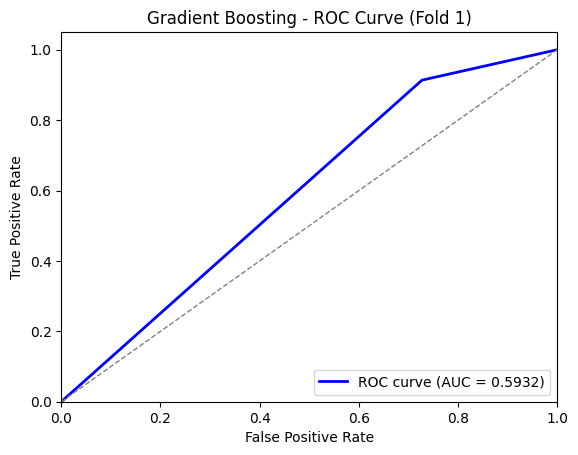

Gradient Boosting - Confusion Matrix (Fold 1):
[[ 22  88]
 [  8 235]]

Gradient Boosting - Confusion Matrix (Fold 1):
[[ 28  82]
 [ 18 225]]

Gradient Boosting - Confusion Matrix (Fold 1):
[[ 41  69]
 [ 35 208]]

Gradient Boosting - Confusion Matrix (Fold 1):
[[ 42  67]
 [ 40 203]]

Gradient Boosting - Average Metrics Across Folds
  Accuracy: 0.7120 ± 0.0108
  AUC:      0.7322 ± 0.0167
Gradient Boosting - Mean Feature Importances Across Folds:
                       feature  mean_importance
0                  multiplayer         0.248432
9                     platform         0.218622
1   cross_platform_multiplayer         0.184422
2               steam_workshop         0.088306
10        months_since_release         0.084890
7         remote_play_on_phone         0.069269
3          steam_trading_cards         0.043831
5                 cloud_gaming         0.017934
8        remote_play_on_tablet         0.017645
6                        stats         0.015856
4             valve_anti

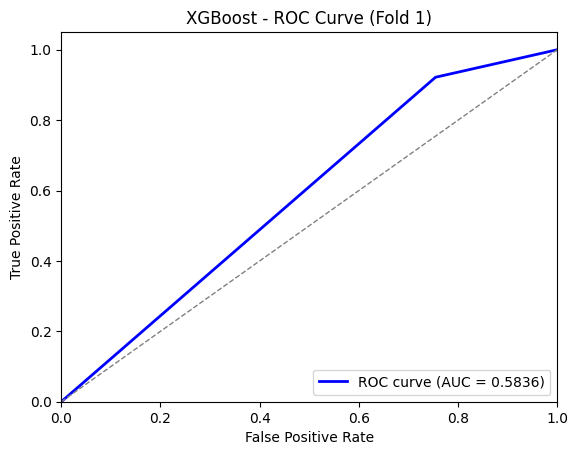

XGBoost - Confusion Matrix (Fold 1):
[[ 21  89]
 [  7 236]]

XGBoost - Confusion Matrix (Fold 1):
[[ 27  83]
 [ 14 229]]

XGBoost - Confusion Matrix (Fold 1):
[[ 33  77]
 [ 22 221]]

XGBoost - Confusion Matrix (Fold 1):
[[ 25  84]
 [ 18 225]]

XGBoost - Average Metrics Across Folds
  Accuracy: 0.7188 ± 0.0072
  AUC:      0.7394 ± 0.0202
XGBoost - Mean Feature Importances Across Folds:
                       feature  mean_importance
0                  multiplayer         0.248606
1   cross_platform_multiplayer         0.189071
9                     platform         0.161669
2               steam_workshop         0.133027
7         remote_play_on_phone         0.092454
3          steam_trading_cards         0.048662
10        months_since_release         0.034302
8        remote_play_on_tablet         0.027213
4             valve_anti_cheat         0.022606
5                 cloud_gaming         0.021927
6                        stats         0.020464

Decision Tree - Confusion Matrix (F

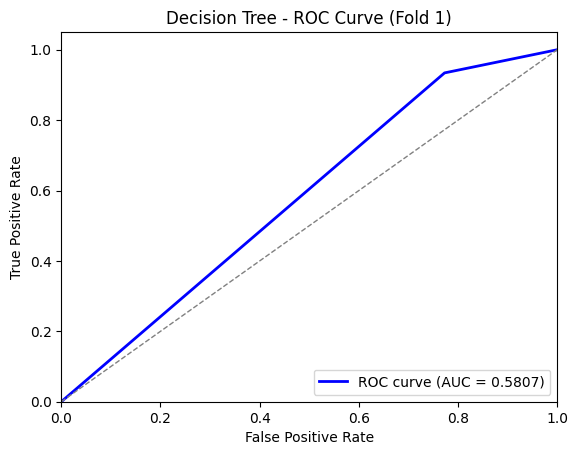

Decision Tree - Confusion Matrix (Fold 1):
[[ 15  95]
 [  5 238]]

Decision Tree - Confusion Matrix (Fold 1):
[[ 17  93]
 [  5 238]]

Decision Tree - Confusion Matrix (Fold 1):
[[ 21  89]
 [  8 235]]

Decision Tree - Confusion Matrix (Fold 1):
[[ 17  92]
 [  2 241]]

Decision Tree - Average Metrics Across Folds
  Accuracy: 0.7222 ± 0.0067
  AUC:      0.7206 ± 0.0207
Decision Tree - Mean Feature Importances Across Folds:
                       feature  mean_importance
0                  multiplayer         0.363059
9                     platform         0.284427
1   cross_platform_multiplayer         0.270341
2               steam_workshop         0.062594
10        months_since_release         0.014150
3          steam_trading_cards         0.004764
5                 cloud_gaming         0.000665
6                        stats         0.000000
4             valve_anti_cheat         0.000000
8        remote_play_on_tablet         0.000000
7         remote_play_on_phone         0.000000


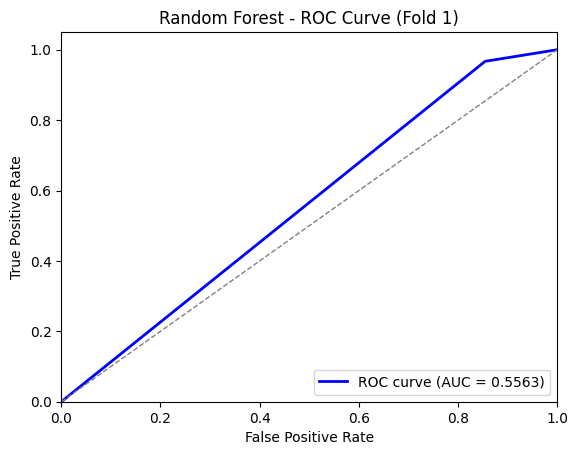

Random Forest - Confusion Matrix (Fold 1):
[[ 16  94]
 [  5 238]]

Random Forest - Confusion Matrix (Fold 1):
[[ 19  91]
 [  7 236]]

Random Forest - Confusion Matrix (Fold 1):
[[ 23  87]
 [  8 235]]

Random Forest - Confusion Matrix (Fold 1):
[[ 17  92]
 [  4 239]]

Random Forest - Average Metrics Across Folds
  Accuracy: 0.7222 ± 0.0068
  AUC:      0.7395 ± 0.0245
Random Forest - Mean Feature Importances Across Folds:
                       feature  mean_importance
0                  multiplayer         0.274743
1   cross_platform_multiplayer         0.235727
9                     platform         0.227532
2               steam_workshop         0.069183
7         remote_play_on_phone         0.050596
3          steam_trading_cards         0.049799
10        months_since_release         0.048924
8        remote_play_on_tablet         0.022601
5                 cloud_gaming         0.017778
6                        stats         0.002374
4             valve_anti_cheat         0.000742


In [134]:
X = df_supervisado.drop('high_rating', axis=1)
X = X.drop('in_app_purchases', axis=1)

model_names = ['Gradient Boosting', 'XGBoost', 'Decision Tree', 'Random Forest']

for model, name in zip(models, model_names):
    accuracies = []
    aucs = []
    fold_importances = []
    
    for fold, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Train model
        model.fit(X_train, y_train)
        
        # Predict test layer
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad clase 1

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        print(f"{name} - Confusion Matrix (Fold 1):\n{cm}\n")
        
        # Metrics
        acc = accuracy_score(y_test, y_pred)
        r_auc = roc_auc_score(y_test, y_pred_proba)
        accuracies.append(acc)
        aucs.append(r_auc)
        
        # Feature importances
        importances = model.feature_importances_
        fold_importances.append(importances)

        # AUC 
        if fold == 1:
            fpr, tpr, thresholds = roc_curve(y_test, y_pred)
            roc_auc = auc(fpr, tpr)
            
            plt.figure()
            plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
            plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
            plt.xlim([0.0, 1.0])
            plt.ylim([0.0, 1.05])
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'{name} - ROC Curve (Fold 1)')
            plt.legend(loc="lower right")
            plt.show()
    
    # Promedio de importancias por variable
    fold_importances = np.array(fold_importances)
    mean_importances = np.mean(fold_importances, axis=0)
    feat_imp = pd.DataFrame({
        'feature': X.columns,
        'mean_importance': mean_importances
    }).sort_values(by='mean_importance', ascending=False)
    
    # Print final metrics
    print(f"{name} - Average Metrics Across Folds")
    print(f"  Accuracy: {np.mean(accuracies):.4f} ± {np.std(accuracies):.4f}")
    print(f"  AUC:      {np.mean(aucs):.4f} ± {np.std(aucs):.4f}")
    print(f"{name} - Mean Feature Importances Across Folds:\n{feat_imp}\n")

## Pruebas de hipótesis

En este apartado se plantea un contraste de hipótesis para analizar si la variable `in_app_purchases` tiene un efecto estadísticamente significativo sobre la probabilidad de que un juego reciba una valoración alta (`high_rating = 1`). Se usarán las probabilidades predichas por el modelo XGBoost.

Antes de aplicar cualquier prueba estadística es necesario comprobar si se cumple la normalidad de los datos y la homocedasticidad (igualdad de varianzas entre grupos).

In [135]:
X = df_supervisado.drop('high_rating', axis=1)

probs = np.zeros(len(y))

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train = y.iloc[train_idx]

    xgb_model.fit(X_train, y_train)
    probs[test_idx] = xgb_model.predict_proba(X_test)[:, 1]

Una vez obtenidas las probabilidades predichas, estas se separan en dos grupos en función del valor de la variable `in_app_purchases`: juegos sin compras dentro de la app (0) y juegos con compras dentro de la app (1). Para decidir qué tipo de contraste estadístico es adecuado, se evalúa si las distribuciones de ambos grupos siguen una distribución normal.

La prueba de Shapiro–Wilk es un test específico para comprobar la normalidad de una muestra. Su hipótesis nula establece que los datos proceden de una distribución normal, mientras que la alternativa indica que no lo hacen. Un p-valor pequeño (menor que 0.05 -> 95% de confianza) implica evidencia suficiente para rechazar la normalidad.

In [136]:
from scipy.stats import shapiro

group0 = probs[df_supervisado["in_app_purchases"] == 0]
group1 = probs[df_supervisado["in_app_purchases"] == 1]

print(shapiro(group0))
print(shapiro(group1))

ShapiroResult(statistic=np.float64(0.9619506715315833), pvalue=np.float64(4.2250613033068774e-18))
ShapiroResult(statistic=np.float64(0.8755806100944422), pvalue=np.float64(2.219566229963154e-18))


El p-valor es muchísimo más pequelo que 0.05 por lo que se descarta normalidad. Dado que no se cumple el supuesto de normalidad, se utiliza la prueba Mann–Whitney U, un test no paramétrico diseñado para comparar dos muestras independientes que no cumplen el supuesto de normalidad.

En este caso, la hipótesis nula establece que las probabilidades predichas de obtener una alta valoración son iguales para juegos con y sin compras dentro de la app. La hipótesis alternativa indica que existe una diferencia entre ambos grupos. Si el p-valor es menor o igual a 0.05 entonces se asume que el grupo 0 y grupo 1 no presentan diferencias en la probabilidad y que por tanto `in_app_purchases` no es importante en la decisión.

In [137]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(group0, group1, alternative="two-sided")
print("Mann–Whitney U p-value:", p_value)

Mann–Whitney U p-value: 2.827635977419276e-175


El p-valor obtenido es extremadamente pequeño, lo que proporciona una evidencia estadística muy fuerte para rechazar la hipótesis nula. Esto confirma que la presencia de compras dentro de la app tiene un impacto significativo en las probabilidades estimadas por el modelo de que un juego reciba una valoración alta.